In [1]:
!pip install python-docx 
!pip install deeppavlov

     |████████████████████████████████| 5.5MB 2.7MB/s 
  Created wheel for python-docx: filename=python_docx-0.8.10-cp36-none-any.whl size=184491 sha256=73dcf853f107683e6d0b4f14945b62e1fab290136736797b124e4cc29810ea4c
  Stored in directory: /root/.cache/pip/wheels/18/0b/a0/1dd62ff812c857c9e487f27d80d53d2b40531bec1acecfa47b
Successfully built python-docx
     |████████████████████████████████| 737kB 2.6MB/s 
     |████████████████████████████████| 317kB 56.4MB/s 
     |████████████████████████████████| 8.0MB 22.0MB/s 
     |████████████████████████████████| 6.7MB 60.7MB/s 
     |████████████████████████████████| 51kB 9.0MB/s 
     |████████████████████████████████| 163kB 70.9MB/s 
     |████████████████████████████████| 61kB 10.7MB/s 
     |████████████████████████████████| 61kB 11.1MB/s 
     |████████████████████████████████| 25.2MB 101kB/s 
     |████████████████████████████████| 2.8MB 46.6MB/s 
     |████████████████████████████████| 2.1MB 47.6MB/s 
     |███████████████████████████

In [1]:
import deeppavlov
from deeppavlov.models.embedders.elmo_embedder import ELMoEmbedder
from nltk.tokenize import sent_tokenize, word_tokenize 
import warnings 
warnings.filterwarnings(action = 'ignore') 
import gensim 
from gensim.models import Word2Vec
import codecs
import numpy as np
import pandas as pd
import docx
import re
import string
import nltk
nltk.download("stopwords")
from nltk.corpus import stopwords
from pymystem3 import Mystem

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package perluniprops to /root/nltk_data...
[nltk_data]   Unzipping misc/perluniprops.zip.
[nltk_data] Downloading package nonbreaking_prefixes to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping corpora/nonbreaking_prefixes.zip.


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [0]:
from sklearn.manifold import TSNE
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from google.colab import drive
drive.mount('/content/drive/')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/


## Содержание.

**ТК состоит из 6 частей, 12 разделов, 62 глав и 424 статей(не считая подпункты, например Статья 330.3).** 

ЧАСТЬ 1.

* Раздел I.

Глава 1.(ст.1-14) Глава 2.(ст.15-22)

ЧАСТЬ 2.

* Раздел II.

Глава 3.(ст.23-28) Глава 4.(ст.29-34) Глава 5.(ст.35) 
Глава 6.(ст.36-39)Глава 7.(ст.40-51) Глава 8.(ст.52-53)
Глава 9.(ст.54-55)

ЧАСТЬ 3.

* Раздел III.

Глава 10.(ст.56-62) Глава 11.(ст.63-71) Глава 12.(ст.72-76)
Глава 13.(ст.77-84) Глава 14.(ст.85-90)

* Раздел IV. 

Глава 15.(ст.91-99) Глава 16.(ст.100-105)

* Раздел V. 

Глава 17.(ст.106-107) Глава 18.(ст.108-113) Глава 19.(ст.114-128)

* Раздел VI.

Глава 20.(ст.129-132) Глава 21.(ст.133-158) Глава 22.(ст.159-163)

* Раздел VII.

Глава 23.(ст.164-166) Глава 24.(ст.167-169) Глава 25.(ст.170-172) 
Глава 26.(ст.173-177) Глава 27.(ст.178-181) Глава 28.(ст.182-188)

* Раздел VIII.

Глава 29.(ст.189-190) Глава 30.(ст.191-195)

* Раздел VIX.

Глава 31.(ст.195.1-197) Глава 32.(ст.198-208)

* Раздел X.

Глава 33.(ст.209-210) Глава 34.(ст.211-215)
Глава 35.(ст.216-218) Глава 36.(ст.219-231)

* Раздел XI.

Глава 37.(ст.232-233) Глава 38.(ст.234-237)
Глава 39.(ст.238-250)

ЧАСТЬ 4.

* Раздел XII.

Глава 40.(ст.251-252) Глава 41.(ст.253-264) Глава 42.(ст.265-272)
Глава 43.(ст.273-281) Глава 44.(ст.282-288) Глава 45.(ст.289-292)
Глава 46.(ст.293-296) Глава 47.(ст.297-302) Глава 48.(ст.303-309) 
Глава 49.(ст.310-312) Глава 49.1.(ст.312.1-312.5) 
Глава 50.(ст.313-327) Глава 51.(ст.328-330) 
Глава 51.1.(ст.330.1-330.5) Глава 52.(ст.331-336) 
Глава 53.(ст.337-341) Глава 54.(ст.342-348) 
Глава 54-1.(ст.348.1-348.12) Глава 55.(ст.349-351.2)

ЧАСТЬ 5.

* Раздел XIII.

Глава 56.(ст.352) Глава 57.(ст.353-369) Глава 58.(ст.370-378)
Глава 59.(ст.379-380) Глава 60.(ст.381-398) Глава 61.(ст.399-418) 
Глава 62.(ст.419)

ЧАСТЬ 6.

* Раздел XIV.
(ст.420-424)

## Чтение ТК

In [0]:
document = docx.Document("drive/My Drive/LabourCode.docx")
text_, text = list(),list()
chapter_, chapter = '', ''
for paragraph in document.paragraphs:
    if paragraph.text!='':
        if paragraph.text.startswith('Статья') and chapter!='' and chapter_!='':
            text.append(chapter)
            text_.append(chapter_)
            chapter = ''
            chapter_ = ''
        if paragraph.text.endswith(('.',';',':')):
            chapter = chapter + paragraph.text
            chapter_ = chapter_ + paragraph.text
            if paragraph.text.endswith(('.',';')): #??????
                chapter = chapter[:-1] + '</s>'
        else:
            chapter = chapter + paragraph.text + '</s>'
            chapter_ = chapter_ + paragraph.text + '.'

In [27]:
labourcode_ = text_[1:]
labourcode = text[1:]
labourcode_

['Статья 1. Цели и задачи трудового законодательства.Целями трудового законодательства являются установление государственных гарантий трудовых прав и свобод граждан, создание благоприятных условий труда, защита прав и интересов работников и работодателей.Основными задачами трудового законодательства являются создание необходимых правовых условий для достижения оптимального согласования интересов сторон трудовых отношений, интересов государства, а также правовое регулирование трудовых отношений и иных непосредственно связанных с ними отношений по:организации труда и управлению трудом;трудоустройству у данного работодателя;подготовке и дополнительному профессиональному образованию работников непосредственно у данного работодателя;(в ред. Федерального закона от 02.07.2013 N 185-ФЗ).социальному партнерству, ведению коллективных переговоров, заключению коллективных договоров и соглашений;участию работников и профессиональных союзов в установлении условий труда и применении трудового законод

In [16]:
print(labourcode[0])

Статья 1. Цели и задачи трудового законодательства</s>Целями трудового законодательства являются установление государственных гарантий трудовых прав и свобод граждан, создание благоприятных условий труда, защита прав и интересов работников и работодателей</s>Основными задачами трудового законодательства являются создание необходимых правовых условий для достижения оптимального согласования интересов сторон трудовых отношений, интересов государства, а также правовое регулирование трудовых отношений и иных непосредственно связанных с ними отношений по:организации труда и управлению трудом</s>трудоустройству у данного работодателя</s>подготовке и дополнительному профессиональному образованию работников непосредственно у данного работодателя</s>(в ред. Федерального закона от 02.07.2013 N 185-ФЗ)</s>социальному партнерству, ведению коллективных переговоров, заключению коллективных договоров и соглашений</s>участию работников и профессиональных союзов в установлении условий труда и применени

In [0]:
pattern = re.compile(r"^Статья ([\d|\.]+)\. (.*)$")
data_, data = {}, {}
for article in labourcode_:
    d = re.findall(pattern, article)
    if len(d)!=0:
        data_[d[0][0]] = d[0][1]
for article in labourcode:
    d = re.findall(pattern, article)
    if len(d)!=0:
        data[d[0][0]] = d[0][1]

In [0]:
lc = {'article №': list(data_.keys()), 'text': list(data_.values()), 'clean text': list(data.values()), 'list tokens': list(data.values())}

In [0]:
import collections

In [0]:
df = pd.DataFrame(lc)

## Preprocessing

In [0]:
#nltk.download('punkt')

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


True

In [0]:
def preprocess_text(text):
    text = text.lower()
    sentences = text.split('</s>')
    sentences_, tokens = list(), list()
    punctuation = '!"#$%&():*+-/<=>?@[\]^_`{|}~,'
    for sent in sentences:
      for p in punctuation:
          sent = sent.replace(p, ' ')
      sentences_.append(sent + '</s>')
    text = " ".join(sentences_)
    return text

def get_tokens(text):
  tokens= list()
  sentences = text.split('</s>')
  sentences = [s for s in sentences if s!='']
  for sent in sentences:
    s_tokens = nltk.word_tokenize(sent, language='russian')
    s_tokens = [token for token in s_tokens if token != " "]
    if len(s_tokens)!=0:
      tokens.append(s_tokens)
  return tokens

In [0]:
for i in range(len(df['clean text'])):
    df['clean text'][i] = preprocess_text(df['clean text'][i])
    df['list tokens'][i] = get_tokens(df['clean text'][i])

In [56]:
df.sample(10)

,article №,text,clean text,list tokens
260,235,Материальная ответственность работодателя за у...,материальная ответственность работодателя за у...,"[[материальная, ответственность, работодателя,..."
159,147,"Оплата труда работников, занятых на работах с ...",оплата труда работников занятых на работах с ...,"[[оплата, труда, работников, занятых, на, рабо..."
55,53.1,Участие представителей работников в заседаниях...,участие представителей работников в заседаниях...,"[[участие, представителей, работников, в, засе..."
354,319,Дополнительный выходной день.Одному из родител...,дополнительный выходной день</s> одному из р...,"[[дополнительный, выходной, день], [одному, из..."
452,371,Принятие решений работодателем с учетом мнения...,принятие решений работодателем с учетом мнения...,"[[принятие, решений, работодателем, с, учетом,..."
11,12,Действие трудового законодательства и иных акт...,действие трудового законодательства и иных акт...,"[[действие, трудового, законодательства, и, ин..."
13,14,"Исчисление сроков.Течение сроков, с которыми н...",исчисление сроков</s> течение сроков с кото...,"[[исчисление, сроков], [течение, сроков, с, ко..."
220,201,Действие ученического договора.Ученический дог...,действие ученического договора</s> ученическ...,"[[действие, ученического, договора], [ученичес..."
194,180,Гарантии и компенсации работникам при ликвидац...,гарантии и компенсации работникам при ликвидац...,"[[гарантии, и, компенсации, работникам, при, л..."
446,365,Взаимодействие федеральной инспекции труда с г...,взаимодействие федеральной инспекции труда с г...,"[[взаимодействие, федеральной, инспекции, труд..."


## Embeddings

In [0]:
#import tensorflow.compat.v1 as tf
#tf.disable_v2_behavior()

In [25]:
elmo = ELMoEmbedder("http://files.deeppavlov.ai/deeppavlov_data/elmo_ru-wiki_600k_steps.tar.gz")

Using TensorFlow backend.


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


INFO:tensorflow:Saver not created because there are no variables in the graph to restore


### Simple example of sentence embedding

In [0]:
sent1 = elmo([['вопрос', 'жизни', 'Вселенной', 'и', 'вообще', 'всего']])
sent1

array([[-0.22791581,  0.07285882, -0.4693267 , ...,  0.32489085,
         0.16321455, -0.15760408]], dtype=float32)

In [0]:
sent1.shape

(1, 1024)

### Embeddings of the Labour Code

In [59]:
sent = elmo(df['list tokens'][0])
sent, sent.shape, len(df['list tokens'][0])

(array([[-0.26646274,  0.0690866 ,  0.00163268, ...,  0.37327114,
          0.8096744 , -0.60722214],
        [-0.20437573, -0.48992866, -0.03937421, ...,  0.06825739,
          0.7690745 , -0.46193433],
        [-0.32554302, -0.03399316, -0.26229325, ...,  0.2342646 ,
          0.38473397, -0.28369254],
        ...,
        [ 0.8847527 , -0.43386057, -0.11234928, ...,  0.69304514,
          0.24890232, -0.69609493],
        [-0.06893878, -0.5456251 ,  0.16050902, ..., -0.6689139 ,
          0.28255713, -0.6612826 ],
        [-0.48735726, -0.24403995,  0.17630474, ..., -0.70944864,
          0.6738627 , -0.08088178]], dtype=float32), (14, 1024), 14)

In [0]:
embeddings = list()
for i in range(len(df['list tokens'])):
  embeddings.append(elmo(df['list tokens'][i]))

df['embedding'] = embeddings

In [72]:
df.sample(10)

,article №,text,clean text,list tokens,embedding
121,110,Продолжительность еженедельного непрерывного о...,продолжительность еженедельного непрерывного о...,"[[продолжительность, еженедельного, непрерывно...","[[0.09607816, -0.74716735, -0.41264898, -0.375..."
97,86,Общие требования при обработке персональных да...,общие требования при обработке персональных да...,"[[общие, требования, при, обработке, персональ...","[[-0.66453594, -0.2500326, -0.40614843, -0.175..."
465,384,Образование комиссий по трудовым спорам.Комисс...,образование комиссий по трудовым спорам</s> ...,"[[образование, комиссий, по, трудовым, спорам]...","[[-0.2932757, 0.28433388, -0.79925346, -0.0312..."
484,403,Рассмотрение коллективного трудового спора с у...,рассмотрение коллективного трудового спора с у...,"[[рассмотрение, коллективного, трудового, спор...","[[-0.43266615, 0.4394567, -0.62419987, -0.1961..."
194,180,Гарантии и компенсации работникам при ликвидац...,гарантии и компенсации работникам при ликвидац...,"[[гарантии, и, компенсации, работникам, при, л...","[[0.07892887, -0.27141577, -0.04404956, -0.149..."
107,96,Работа в ночное время.Ночное время - время с 2...,работа в ночное время</s> ночное время вре...,"[[работа, в, ночное, время], [ночное, время, в...","[[-0.009662509, 0.29394573, 0.020331144, -0.33..."
79,71,Результат испытания при приеме на работу.При н...,результат испытания при приеме на работу</s> ...,"[[результат, испытания, при, приеме, на, работ...","[[-1.0417341, -0.11818827, 0.0042583547, -0.54..."
289,262.2,Очередность предоставления ежегодных оплачивае...,очередность предоставления ежегодных оплачивае...,"[[очередность, предоставления, ежегодных, опла...","[[-0.64330506, -0.49399215, -0.5868258, -0.309..."
270,245,Коллективная (бригадная) материальная ответств...,коллективная бригадная материальная ответств...,"[[коллективная, бригадная, материальная, ответ...","[[-0.32208443, -0.38350838, -0.34277767, 0.114..."
101,90,"Ответственность за нарушение норм, регулирующи...",ответственность за нарушение норм регулирующи...,"[[ответственность, за, нарушение, норм, регули...","[[-0.3463338, -0.17965175, -0.004753305, -0.43..."


## Visualization

In [0]:
def tsne_plot(ind):

    #labels = df['clean text'][ind].split('</s>')
    #labels = [l for l in labels if l!='']
    labels = ['sentence ' + str(i) for i in range(1,len(df['list tokens'][ind])+1)]
    tokens = list(df['embedding'][ind])
    tokens = [list(t) for t in tokens]

    #tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    tsne_model = TSNE(n_components=2, init='pca', n_iter=3500, random_state=32)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.title("Embeddings of article №"+df['article №'][ind])
    plt.show()

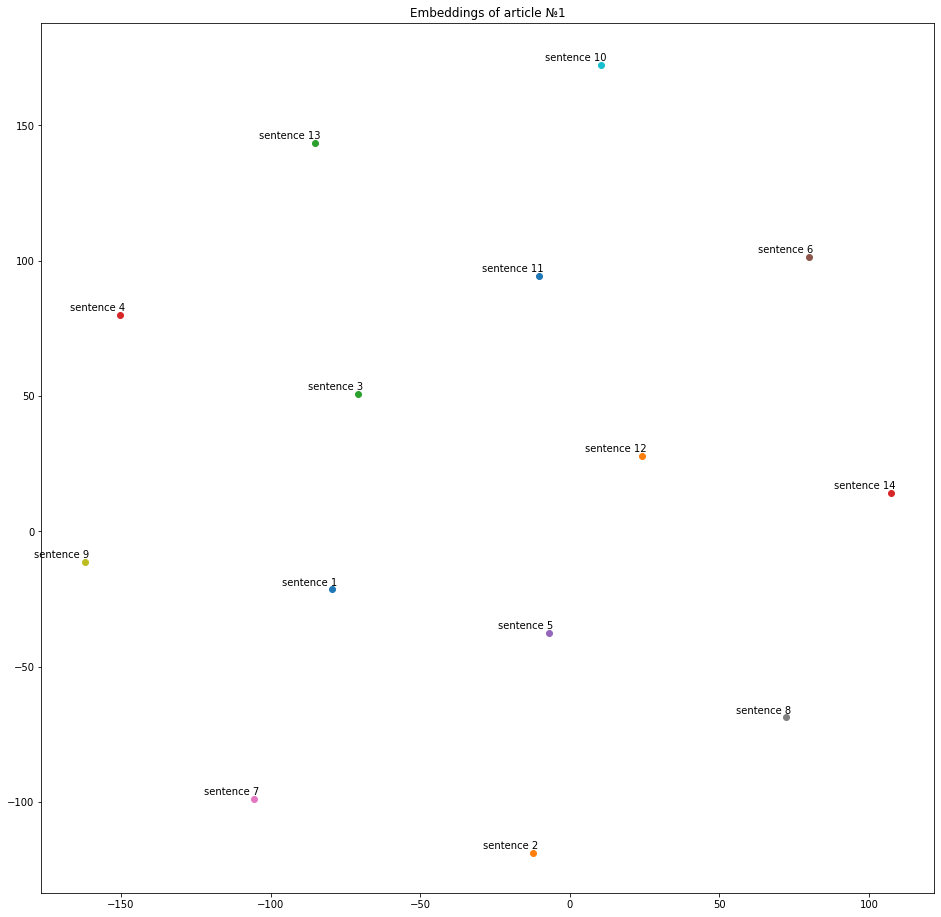

In [91]:
tsne_plot(0)